<a href="https://colab.research.google.com/github/pbuslaev/test_ipynb/blob/main/test_user_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This notebook has to be run on Google colab

<a target="_blank" href="https://colab.research.google.com/github/pbuslaev/test_ipynb/blob/main/test_user_input.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
#@title Conda installation
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


In [1]:
#@title Intall packages
!pip install dimorphite_dl --upgrade
!mamba install -c conda-forge rdkit sympy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.0 MB/s eta 0:00:00
  Created wheel for dimorphite_dl: filename=dimorphite_dl-1.3.2-py3-none-any.whl size=16867 sha256=6d1a0631315638da1a0a2b5848ecb6847b0307d45abed8848a6c366cc7444905
  Stored in directory: /root/.cache/pip/wheels/61/49/66/d58266747837b243c5495f897daaa3ee4f4dc6115755a9ef72
Successfully built dimorphite_dl

Looking for: ['rdkit', 'sympy']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64   1%
conda-forge/noarch    15%[+] 0.3s
conda-forge/linux-64   5%
conda-forge/noarch    39%[+] 0.4s
conda-forge/linux-64  10%
conda-forge/noarch    62%[+] 0.5s
conda-forge/linux-64  15%
conda-forge/noarch    

In [2]:
#@title Import packages
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 300,300
from IPython.display import SVG
from dimorphite_dl import DimorphiteDL

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
  get_ipython().events.register('pre_run_cell', set_css)

This is Molecule 0


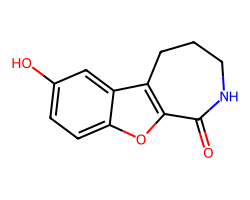

This is Molecule 1


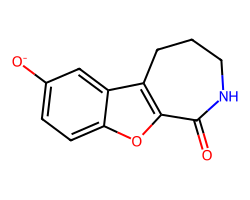

This is Molecule 2


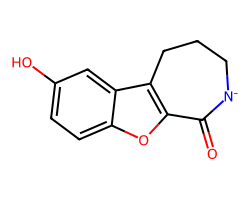

This is Molecule 3


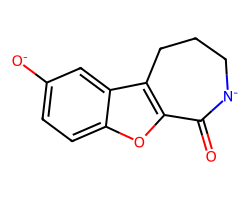

In [6]:
#@title Input molecule
#@markdown Please provide molecule SMILES. We will generate its protonation
#@markdown states.
smiles = "c1cc2c(cc1O)c3c(o2)C(=O)NCCC3" #@param {type: "string"}
dimorphite_dl = DimorphiteDL(
    min_ph=1,
    max_ph=13,
    max_variants=256,
    label_states=False,
    pka_precision=0.1
)
mols = [Chem.MolFromSmiles(mol) for mol in dimorphite_dl.protonate(smiles)]
mols = sorted(mols, key = lambda x: Chem.GetFormalCharge(x), reverse=True)
# Now mols[0] is the highest protonation state
for i, m in enumerate(mols):
    print(f"This is Molecule {i}")
    d2d = rdMolDraw2D.MolDraw2DSVG(250, 200)
    d2d.DrawMolecule(m)
    d2d.FinishDrawing()
    display(SVG(d2d.GetDrawingText()))

In [ ]:
#@title Select molecules
#@markdown Which molecule states do you want to use?
#@markdown The molecule ids are shown in the previous cell.
mol1 = True #@param {type:"boolean"}
mol2 = False #@param {type:"boolean"}
mol3 = False #@param {type:"boolean"}
mol4 = False #@param {type:"boolean"}
mol5 = False #@param {type:"boolean"}
mol6 = False #@param {type:"boolean"}
mol7 = False #@param {type:"boolean"}
mol8 = False #@param {type:"boolean"}
mol9 = False #@param {type:"boolean"}
mol10 = False #@param {type:"boolean"}

mols_to_use = [
    mol1, mol2, mol3, mol4, mol5, mol6, mol7, mol8, mol9, mol10,
][:len(mols)]

In [ ]:
#@title Get titratable site
# Highest protonation state is always in state[0]
titratable_sites = []
pmol = mols[0]
for m in mols[1:]:
    from rdkit.Chem import rdFMCS
    res = rdFMCS.FindMCS([pmol, pmol])
    similar_patt = Chem.MolFromSmarts(res.smartsString)
    subst_matches_pmol = pmol.GetSubstructMatches(similar_patt)[0]
    subst_matches = m.GetSubstructMatches(similar_patt)[0]
    for a0, a in zip(subst_matches_pmol, subst_matches):
        if (pmol.GetAtomWithIdx(a0).GetFormalCharge() !=
            m.GetAtomWithIdx(a).GetFormalCharge()
        ):
            titratable_sites.append(a0)
titratable_sites = list(set(titratable_sites))

In [ ]:
titratable_sites

[0, 5]

In [ ]:
#@title Get list of symmetrical titratable sites
from rdkit.Chem import rdFMCS
res = rdFMCS.FindMCS([pmol, pmol])
similar_patt = Chem.MolFromSmarts(res.smartsString)
subst_matches = pmol.GetSubstructMatches(similar_patt, uniquify=False)
print(subst_matches)
symmetrical_sites = {x.GetIdx():[x.GetIdx()] for x in pmol.GetAtoms()}
if len(subst_matches) > 1:
    for sm in subst_matches[1:]:
        for ts in titratable_sites:
            if sm[subst_matches_pmol.index(ts)] not in symmetrical_sites[ts]:
                symmetrical_sites[ts].append(sm[subst_matches_pmol.index(ts)])
                symmetrical_sites[sm[subst_matches_pmol.index(ts)]].append(ts)
symmetrical_sites

((0, 1, 2, 3, 4, 5, 6),)


{0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6]}

In [ ]:
#@title Get list of sites with multiple hydrogens
sites_with_multiple_hs = []
for ts in titratable_sites:
    if (
        pmol.GetAtomWithIdx(ts).GetNumExplicitHs()
        + pmol.GetAtomWithIdx(ts).GetNumImplicitHs()
        > 1
    ):
        sites_with_multiple_hs.append(ts)
sites_with_multiple_hs

[]

In [ ]:
#@title Highlight sites with multiple hydrogens
if sites_with_multiple_hs:
    print(
        f"We detected {len(sites_with_multiple_hs)} sites to which multiple "
        + "hydrogens are attached. Please, take a careful look and let us know "
        + "whether we should consider those sites as multisite with each "
        + "hydrogen titrating separately, or as single site, where only one "
        + "hydrogen is titrated. Note, that we highlight the titratable sites "
        + "for the molecule in the highest protonation state, The ."
    )
    colors = [(1.0, 0.0, 0.0, 0.2)]
    for i, a in enumerate(sites_with_multiple_hs):
        (pmol.GetAtomWithIdx(a)).SetProp('atomNote', str(i+1))
    d2d = rdMolDraw2D.MolDraw2DSVG(250, 200)
    at_highlights = {x: [colors[0]] for x in sites_with_multiple_hs}
    at_rads = {x: 0.5 for x in sites_with_multiple_hs}
    d2d.DrawMoleculeWithHighlights(pmol,"", at_highlights,{}, at_rads, {})
    d2d.FinishDrawing()
    display(SVG(d2d.GetDrawingText()))
    for a in sites_with_multiple_hs:
        (pmol.GetAtomWithIdx(a)).SetProp('atomNote', '')
else:
    mHs = None
    print(
        "No sites to which multiple hydrogens are attached were detected. "
        + " You can skip the next step."
    )

No sites to which multiple hydrogens are attached were detected.  You can skip the next step.


In [ ]:
#@title Select treatment of multi-hydrogen sites
#@markdown Do you want to treat titratable sites with multiple hydrogens
#@markdown attached as single multisite or no? Default is no. If you want
#@markdown to treat those with multisite representation tick the corresponding
#@markdown variable. The id of titratable sites are shown in the previous cell.
multiHs_titratable_site_1 = True #@param {type:"boolean"}
multiHs_titratable_site_2 = False #@param {type:"boolean"}
multiHs_titratable_site_3 = False #@param {type:"boolean"}
multiHs_titratable_site_4 = False #@param {type:"boolean"}
multiHs_titratable_site_5 = False #@param {type:"boolean"}

mHs = [
    multiHs_titratable_site_1,
    multiHs_titratable_site_2,
    multiHs_titratable_site_3,
    multiHs_titratable_site_4,
    multiHs_titratable_site_5,
][:len(sites_with_multiple_hs)]

In [ ]:
mHs

[]

In [ ]:
#@title Symmetrical states treatment
states = {}  # Dictionary of states and state treatment. Each state has a
# molecule, number of states and number of states for consideration
# NOTE: state treatment should be fixed/changed after user input is provided
for i, m in enumerate(mols):
    from rdkit.Chem import rdFMCS
    res = rdFMCS.FindMCS([pmol, pmol])
    similar_patt = Chem.MolFromSmarts(res.smartsString)
    subst_matches = m.GetSubstructMatches(similar_patt)[0]
    charges = {}
    for a in symmetrical_sites:
        charges[a] = [
            m.GetAtomWithIdx(
                subst_matches[subst_matches_pmol.index(a)]
            ).GetFormalCharge()
        ]
        if len(symmetrical_sites[a]) == 1:
            continue
        for idx in symmetrical_sites[a][1:]:
            charges[a].append(
                m.GetAtomWithIdx(
                    subst_matches[subst_matches_pmol.index(idx)]
                ).GetFormalCharge()
            )
    if all([len(list(set(x))) == 1 for x in charges.values()]):
        states[i] = (m, 1, 1)
        continue
    print(f"For molecule {i} symmetrical states were detected:")
    d2d = rdMolDraw2D.MolDraw2DSVG(250, 200)
    d2d.DrawMolecule(m)
    d2d.FinishDrawing()
    display(SVG(d2d.GetDrawingText()))
    print("These are found symmetrical states:")
    atoms_to_change = [x for x in charges if len(charges[x]) > 1]
    atoms_with_dif_charges = [
        x for x in charges if len(charges[x]) == 1 and
        charges[x][0] != pmol.GetAtomWithIdx(x).GetFormalCharge()
    ]
    charge_combinations = list(zip(*[charges[x] for x in atoms_to_change]))
    state_charges = []
    from copy import deepcopy
    for c in charge_combinations:
        m_new = deepcopy(pmol)
        for a in atoms_with_dif_charges:
            m_new.GetAtomWithIdx(a).SetFormalCharge(
                pmol.GetAtomWithIdx(a).GetFormalCharge() - 1
            )
            m_new.GetAtomWithIdx(a).SetNumExplicitHs(
                pmol.GetAtomWithIdx(a).GetNumExplicitHs() - 1
            )
        for a_charge, a in zip(c, atoms_to_change):
            if a_charge != pmol.GetAtomWithIdx(a).GetFormalCharge():
                m_new.GetAtomWithIdx(a).SetFormalCharge(a_charge)
                m_new.GetAtomWithIdx(a).SetNumExplicitHs(
                    pmol.GetAtomWithIdx(a).GetNumExplicitHs() - 1
                )
        if [x.GetFormalCharge() for x in m_new.GetAtoms()] in state_charges:
            continue
        state_charges.append([x.GetFormalCharge() for x in m_new.GetAtoms()])
        d2d = rdMolDraw2D.MolDraw2DSVG(250, 200)
        colors = [(0.0, 1.0, 0.0, 0.2)]
        at_highlights = {x: [colors[0]] for x in atoms_to_change}
        at_rads = {x: 0.5 for x in atoms_to_change}
        d2d.DrawMoleculeWithHighlights(m_new,"", at_highlights,{}, at_rads, {})
        d2d.FinishDrawing()
        display(SVG(d2d.GetDrawingText()))
    states[i] = (m, len(state_charges), 1)
if all([x[1] == 1 for x in states.values()]):
    ss = None
    print(
        "No symmetrical states were found "
        + " You can skip the next step."
    )

No symmetrical states were found  You can skip the next step.


In [ ]:
#@title Select treatment of symmetrical states
#@markdown Please, select whether to inclue symmetrical states for a molecule
#@markdown or not. If for a particular molecule there are no symmetrical
#@markdown states available, selecting True won't influence the behaviour
use_symmetrical_states_molecule_0 = True #@param {type:"boolean"}
use_symmetrical_states_molecule_1 = True #@param {type:"boolean"}
use_symmetrical_states_molecule_2 = False #@param {type:"boolean"}
use_symmetrical_states_molecule_3 = False #@param {type:"boolean"}
use_symmetrical_states_molecule_4 = False #@param {type:"boolean"}
use_symmetrical_states_molecule_5 = False #@param {type:"boolean"}
use_symmetrical_states_molecule_6 = False #@param {type:"boolean"}
use_symmetrical_states_molecule_7 = False #@param {type:"boolean"}
use_symmetrical_states_molecule_8 = False #@param {type:"boolean"}
use_symmetrical_states_molecule_9 = False #@param {type:"boolean"}

ss = [
    use_symmetrical_states_molecule_0,
    use_symmetrical_states_molecule_1,
    use_symmetrical_states_molecule_2,
    use_symmetrical_states_molecule_3,
    use_symmetrical_states_molecule_4,
    use_symmetrical_states_molecule_5,
    use_symmetrical_states_molecule_6,
    use_symmetrical_states_molecule_7,
    use_symmetrical_states_molecule_8,
    use_symmetrical_states_molecule_9,
][:len(states)]

In [ ]:
#@title Update states information
for i, s in zip(states.keys(), states.values()):
    if ss:
        t = ss[i]
    else:
        t = False
    if t:
        states[i] = (s[0], s[1], s[1])
    if mHs:
        from rdkit.Chem import rdFMCS
        res = rdFMCS.FindMCS([pmol, pmol])
        similar_patt = Chem.MolFromSmarts(res.smartsString)
        subst_matches = s[0].GetSubstructMatches(similar_patt)[0]
        factor = 1
        for idx in sites_with_multiple_hs:
            if not mHs[sites_with_multiple_hs.index(idx)]:
                continue
            a = s[0].GetAtomWithIdx(
                subst_matches[subst_matches_pmol.index(idx)]
            )
            a_p = pmol.GetAtomWithIdx(idx)
            if (
                (a.GetNumExplicitHs() + a.GetNumImplicitHs()) !=
                (a_p.GetNumExplicitHs() + a_p.GetNumImplicitHs())
            ):
                factor *= (a_p.GetNumExplicitHs() + a_p.GetNumImplicitHs())
        states[i] = (s[0], s[1], states[i][1] * factor)
states

{0: (<rdkit.Chem.rdchem.Mol at 0x7e5d7ed4f1b0>, 1, 1),
 1: (<rdkit.Chem.rdchem.Mol at 0x7e5d7ed4f140>, 1, 1),
 2: (<rdkit.Chem.rdchem.Mol at 0x7e5db07b5770>, 1, 1),
 3: (<rdkit.Chem.rdchem.Mol at 0x7e5db07b5850>, 1, 1)}

We found the following transitions between protonation states:
Transition 0


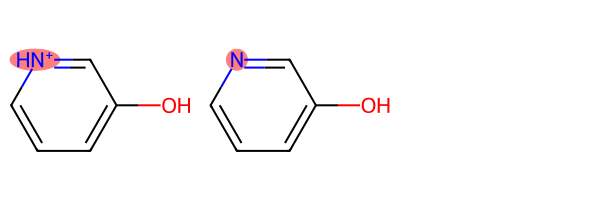

Transition 1


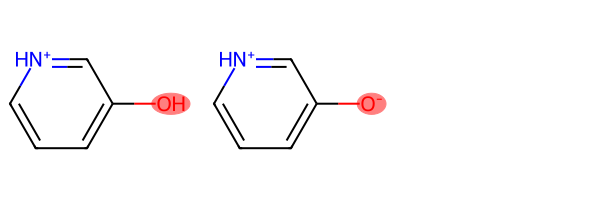

Transition 2


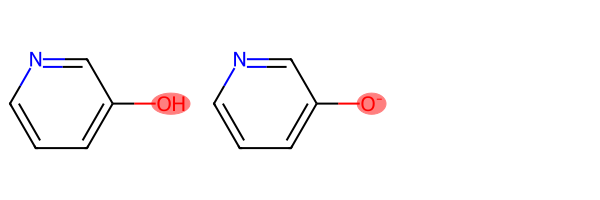

Transition 3


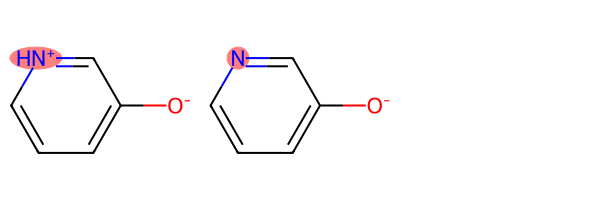

In [ ]:
#@title Show state transitions
state_transitions = []
for i, m1 in enumerate(mols):
    for j, m2 in enumerate(mols[i+1:]):
        from rdkit.Chem import rdFMCS
        res = rdFMCS.FindMCS([pmol, pmol])
        similar_patt = Chem.MolFromSmarts(res.smartsString)
        subst_matches1 = m1.GetSubstructMatches(similar_patt)[0]
        subst_matches2 = m2.GetSubstructMatches(similar_patt)[0]
        n_diffs = 0
        for idx in titratable_sites:
            if (
                m1.GetAtomWithIdx(
                    subst_matches1[subst_matches_pmol.index(idx)]
                ).GetFormalCharge() !=
                m2.GetAtomWithIdx(
                    subst_matches2[subst_matches_pmol.index(idx)]
                ).GetFormalCharge()
            ):
                n_diffs += 1
        if n_diffs != 1:
            continue
        state_transitions.append((i, i + 1+j, m1, m2))

def view_difference(mol1, mol2):
    mcs = rdFMCS.FindMCS([mol1,mol2])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    match1 = mol1.GetSubstructMatch(mcs_mol)
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    target_atm2 = []
    for a1, a2 in zip(match1, match2):
        if (
            mol1.GetAtomWithIdx(a1).GetFormalCharge() !=
            mol2.GetAtomWithIdx(a2).GetFormalCharge()
        ):
            target_atm1.append(a1)
            target_atm2.append(a2)
    d2d = Draw.MolsToGridImage(
        [mol1, mol2],
        highlightAtomLists=[target_atm1, target_atm2],
        useSVG = True,
    )
    display(d2d)

print("We found the following transitions between protonation states:")
for i, st_t in enumerate(state_transitions):
    print(f"Transition {i}")
    view_difference(st_t[2], st_t[3])

In [ ]:
state_transitions

[(0,
  1,
  <rdkit.Chem.rdchem.Mol at 0x7e5d7ed4f140>),
 (0,
  2,
  <rdkit.Chem.rdchem.Mol at 0x7e5db07b5770>),
 (1,
  3,
  <rdkit.Chem.rdchem.Mol at 0x7e5db07b5850>),
 (2,
  3,
  <rdkit.Chem.rdchem.Mol at 0x7e5db07b5850>)]

In [ ]:
#@title Provide pKa values for transitions between protonated states
#@markdown Please, provide pKa values for protonated states.
pka_0 = 4.0 #@param {type:"number"}
pka_1 = 5.0 #@param {type:"number"}
pka_2 = 7.0 #@param {type:"number"}
pka_3 = 6.0 #@param {type:"number"}
pka_4 = 0.0 #@param {type:"number"}
pka_5 = 0.0 #@param {type:"number"}
pka_6 = 0.0 #@param {type:"number"}
pka_7 = 0.0 #@param {type:"number"}
pka_8 = 0.0 #@param {type:"number"}
pka_9 = 0.0 #@param {type:"number"}

pkas = [
    pka_0, pka_1, pka_2, pka_3, pka_4,
    pka_5, pka_6, pka_7, pka_8, pka_9,
][:len(state_transitions)]

In [ ]:
#@title Generate pKa matrix equation
import numpy as np
from sympy import Matrix, MatrixSymbol, symbols
ph = symbols("pH")
A = np.zeros((len(state_transitions) + 1, len(mols)), dtype = 'int')
b = MatrixSymbol('b', len(state_transitions) + 1, 1).as_explicit()
bsubs = {b[0,0]: ph}
for i, (tr, pka) in enumerate(zip(state_transitions, pkas)):
    state1 = tr[0]
    state2 = tr[1]
    n = states[state1][2]
    m = states[state2][2]
    if Chem.GetFormalCharge(tr[2]) > Chem.GetFormalCharge(tr[3]):
        A[i+1, state1] =-1
        A[i+1, state2] = 1
        bsubs[b[i + 1, 0]] = pka - np.log10(n/m) - ph
    else:
        A[i+1, state1] = 1
        A[i+1, state2] = -1
        bsubs[b[i + 1, 0]] = pka - np.log10(m/n) - ph
A[0, 0] = 1
m = Matrix(A)
_, inds = m.T.rref()
removed_inds = [x for x in range(len(state_transitions) + 1) if x not in inds]
Ar = A[list(inds)]
Ad = A[list(removed_inds)]
mr = Matrix(Ar)
md = Matrix(Ad)
p = MatrixSymbol('p', len(mols), 1).as_explicit()
b = b.subs(bsubs)
br = MatrixSymbol('br', len(inds), 1).as_explicit()
brsubs = {}
for i, idx in enumerate(inds):
    brsubs[br[i, 0]] = b[idx, 0]

br = br.subs(brsubs)
br

sol = mr.solve(br)
print(
    "Recommended pKa values for protonations states, considering all previous "
    + "input are:"
)
for i in range(len(mols)):
    print(f"State {i}: pKa = {sol[i,0]}")

Recommended pKa values for protonations states, considering all previous input are:
State 0: pKa = pH
State 1: pKa = 4.00000000000000
State 2: pKa = 5.00000000000000
State 3: pKa = 11.0 - pH


This is Molecule 0


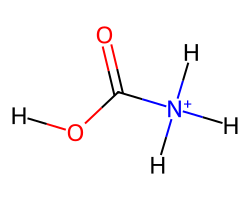

This is Molecule 1


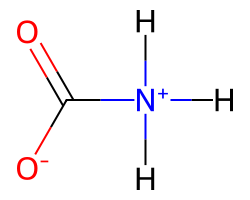

In [ ]:
#@title Provide topologies data
#@markdown If parameterisation is needed, all included molecules will be
#@markdown parameterized with open force field. If not, for all
is_parameterisation_needed = True #@param {type:"boolean"}
included_mols = [m for m,i in zip(mols, incl) if i]
included_svgs = [s for s,i in zip(svgs, incl) if i]
for i, s in enumerate(included_svgs):
    print(f"This is Molecule {i}")
    display(SVG(svgs[i]))

parameters_for_molecule_0 = "" #@param {type:"string"}
parameters_for_molecule_1 = "" #@param {type:"string"}
parameters_for_molecule_2 = "" #@param {type:"string"}
parameters_for_molecule_3 = "" #@param {type:"string"}
parameters_for_molecule_4 = "" #@param {type:"string"}

In [ ]:
from DimorphiteDL import ProtSubstructFuncs

ModuleNotFoundError: ignored

In [ ]:
import dimorphite_dl as ddl

In [ ]:
DimorphiteDL.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: ignored

In [ ]:
from openff.toolkit import Molecule, Topology, ForceField

In [ ]:
mol = Molecule(path_to_mol)

In [ ]:
ff = ForceField("openff-2.1.0.offxml")

In [ ]:
top = mol.to_topology()

In [ ]:
from openff.interchange import Interchange

In [ ]:
inter = Interchange.from_smirnoff(force_field=ff, topology=top)

In [ ]:
inter.to_top("test.top")

In [ ]:
!mamba install -c conda-forge openff-toolkit

/usr/local/lib/python3.10/site-packages/conda_package_streaming/package_streaming.py:19: UserWarning: zstandard could not be imported. Running without .conda support.
  warnings.warn("zstandard could not be imported. Running without .conda support.")
/usr/local/lib/python3.10/site-packages/conda_package_handling/api.py:29: UserWarning: Install zstandard Python bindings for .conda support
  _warnings.warn("Install zstandard Python bindings for .conda support")

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║█